<a href="https://colab.research.google.com/github/lu42cas/testando_biblioteca_pandas/blob/main/Aula_pandas2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df1 = pd.read_excel("/content/drive/MyDrive/2be7520c-94cd-463f-8432-d580d0810344 (1)/Cusro_Python_Pandas_Digital_Innovation-master/datasets/Aracaju.xlsx")
df2 = pd.read_excel("/content/drive/MyDrive/2be7520c-94cd-463f-8432-d580d0810344 (1)/Cusro_Python_Pandas_Digital_Innovation-master/datasets/Fortaleza.xlsx")
df3 = pd.read_excel("/content/drive/MyDrive/2be7520c-94cd-463f-8432-d580d0810344 (1)/Cusro_Python_Pandas_Digital_Innovation-master/datasets/Natal.xlsx")
df4 = pd.read_excel("/content/drive/MyDrive/2be7520c-94cd-463f-8432-d580d0810344 (1)/Cusro_Python_Pandas_Digital_Innovation-master/datasets/Recife.xlsx")
df5 = pd.read_excel("/content/drive/MyDrive/2be7520c-94cd-463f-8432-d580d0810344 (1)/Cusro_Python_Pandas_Digital_Innovation-master/datasets/Salvador.xlsx")

In [ ]:
#juntando todos os arquivos, ou seja, concatenar
df = pd.concat([df1,df2,df3,df4,df5])

In [ ]:
df.tail()
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [ ]:
#pegar uma amostra do conjunto de dados
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde
125,Recife,2019-03-02,37.60,983,4
211,Salvador,2019-01-02,141.05,1035,3
81,Salvador,2019-01-01,17.36,1037,2
215,Salvador,2019-01-02,203.84,1036,1
19,Salvador,2019-01-01,167.12,1035,1


In [ ]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [ ]:
#alterando o tipo de dado da coluna LojaID
df["LojaID"] = df["LojaID"].astype("object")

In [ ]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

In [ ]:
#consultando linhas com valores faltantes
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [ ]:
#no exemplo acima, não tinha nenhum valor nulo (ao contrário do vídeo da prof)
#se tivesse, daria por ex para substituir o valor nulo pela média nulo pela 
df["Vendas"].fillna(df["Vendas"].mean(), inplace=True)

In [ ]:
df.sample(15)

,Cidade,Data,Vendas,LojaID,Qtde
72,Aracaju,2018-01-01,168.95,1523,7
176,Natal,2019-01-02,19.42,1035,3
151,Natal,2019-01-02,14.63,1035,1
60,Aracaju,2018-01-01,215.88,1521,3
103,Aracaju,2018-01-01,12.62,1522,3
229,Natal,2019-01-02,43.08,1036,2
21,Salvador,2019-01-01,39.72,1035,3
5,Natal,2019-03-30,674.00,854,2
94,Salvador,2019-01-01,33.24,1037,1
128,Natal,2019-01-02,36.84,1034,1


In [ ]:
#substituindo os valores nulos por zero
df["Vendas"].fillna(0,inplace=True)

In [ ]:
#apagandos as linhas com valores nulos
df.dropna(inplace=True)

In [ ]:
#apagando as linhas com valores nulos com base apenas em 1 coluna
df.dropna(subset=["Vendas"], inplace=True)

In [ ]:
#remover linhas que estejam valores faltantes em todas as colunas
df.dropna(how="all", inplace=True)

**Criando Colunas Novas**

In [ ]:
#Criando a coluna de receita
df["Receita"] = df["Vendas"].mul(df["Qtde"])

In [ ]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [ ]:
#e se eu não tivesse Qtde?
df["Receita/Vendas"] = df["Receita"] / df["Vendas"]
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
0,Aracaju,2018-01-01,142.00,1520,1,142.00,1.0
1,Aracaju,2018-01-01,14.21,1522,6,85.26,6.0
2,Aracaju,2018-01-01,71.55,1520,1,71.55,1.0
3,Aracaju,2018-01-01,3.01,1521,7,21.07,7.0
4,Aracaju,2018-01-01,24.51,1522,8,196.08,8.0


In [ ]:
#retornando a maior receita
df["Receita"].max()

3544.0

In [ ]:
#menor receita
df["Receita"].min()

3.34

In [ ]:
#perceba que o min e max não mostram quais lojas tiveram essa receita. por isso podemos usar o nlargest, no caso eu pedi o top 3
df.nlargest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0


In [ ]:
#nsmallest
df.nsmallest(4, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
118,Aracaju,2018-01-01,3.34,1522,1,3.34,1.0
65,Recife,2019-01-01,4.01,981,1,4.01,1.0
92,Natal,2019-01-02,4.57,1035,1,4.57,1.0
92,Salvador,2019-01-01,4.57,1035,1,4.57,1.0


In [ ]:
#quero agrupar as receitas por cidade
df.groupby("Cidade")["Receita"].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

In [ ]:
#ordenando o conjunto de dados
df.sort_values("Receita", ascending=False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
30,Natal,2018-10-02,856.0,853,4,3424.0,4.0
41,Natal,2018-05-20,835.0,852,4,3340.0,4.0
38,Natal,2018-02-25,828.0,852,4,3312.0,4.0
10,Natal,2018-10-27,828.0,852,4,3312.0,4.0
69,Natal,2019-03-24,817.0,852,4,3268.0,4.0
62,Natal,2018-02-10,793.0,854,4,3172.0,4.0
52,Natal,2018-04-27,778.0,854,4,3112.0,4.0


**Trabalhando com datas**

In [ ]:
#transformando a coluna de data em tipo inteiro
df["Data"] = df["Data"].astype("int64")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  


In [ ]:
#verificando o tipo de dado de cada coluna
df.dtypes

Cidade     object
Data        int64
Vendas    float64
LojaID      int64
Qtde        int64
dtype: object

In [ ]:
#transformando coluna de data em data
df["Data"] = pd.to_datetime(df["Data"])

In [ ]:
df.dtypes

Cidade                    object
Data              datetime64[ns]
Vendas                   float64
LojaID                     int64
Qtde                       int64
Receita                  float64
Receita/Vendas           float64
dtype: object

In [ ]:
#agrupamento por ano
df.groupby(df["Data"].dt.year)["Receita"].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [ ]:
#criando uma nova coluna com ano
df["Ano_Venda"] = df["Data"].dt.year

In [ ]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
0,Aracaju,2018-01-01,142.00,1520,1,142.00,1.0
1,Aracaju,2018-01-01,14.21,1522,6,85.26,6.0
2,Aracaju,2018-01-01,71.55,1520,1,71.55,1.0
3,Aracaju,2018-01-01,3.01,1521,7,21.07,7.0
4,Aracaju,2018-01-01,24.51,1522,8,196.08,8.0


In [ ]:
#retornando a data mais antiga
df["Data"].min()

Timestamp('2018-01-01 00:00:00')

In [ ]:
#calculando a diferença de dias
df["diferenca_dias"] = df["Data"] - df["Data"].min()

df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,diferenca_dias
8,Fortaleza,2019-02-11,37.49,1005,1,37.49,1.0,2019,406 days
72,Natal,2018-05-02,612.00,854,4,2448.00,4.0,2018,121 days
11,Fortaleza,2019-01-01,42.19,1003,3,126.57,3.0,2019,365 days
49,Aracaju,2018-01-01,53.74,1522,3,161.22,3.0,2018,0 days
90,Aracaju,2018-01-01,16.27,1522,1,16.27,1.0,2018,0 days


In [ ]:
#criando a coluna de trimestre
df["trimestre_venda"] = df["Data"].dt.quarter

df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,diferenca_dias,trimestre_venda
91,Aracaju,2018-01-01,200.85,1522,6,1205.10,6.0,2018,0 days,1
44,Salvador,2019-01-01,43.26,1037,2,86.52,2.0,2019,365 days,1
63,Aracaju,2018-01-01,39.87,1522,5,199.35,5.0,2018,0 days,1
112,Fortaleza,2019-03-02,133.59,982,1,133.59,1.0,2019,425 days,1
128,Salvador,2019-03-02,36.84,1034,1,36.84,1.0,2019,425 days,1


In [ ]:
#filtrando as vendas de 2019 do mês de março
vendas_marco_19 = df.loc[(df["Data"].dt.year == 2019) & (df["Data"].dt.month == 3)]

vendas_marco_19

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,diferenca_dias,trimestre_venda
108,Fortaleza,2019-03-02,152.89,981,4,611.56,4.0,2019,425 days,1
109,Fortaleza,2019-03-02,18.90,982,6,113.40,6.0,2019,425 days,1
110,Fortaleza,2019-03-02,51.98,983,6,311.88,6.0,2019,425 days,1
111,Fortaleza,2019-03-02,8.00,981,3,24.00,3.0,2019,425 days,1
112,Fortaleza,2019-03-02,133.59,982,1,133.59,1.0,2019,425 days,1
...,...,...,...,...,...,...,...,...,...,...
137,Salvador,2019-03-02,51.66,1036,3,154.98,3.0,2019,425 days,1
138,Salvador,2019-03-02,212.03,1037,3,636.09,3.0,2019,425 days,1
139,Salvador,2019-03-02,169.01,1036,1,169.01,1.0,2019,425 days,1
140,Salvador,2019-03-02,20.79,1036,2,41.58,2.0,2019,425 days,1





**VISUALIZAÇÃO DE DADOS**

In [ ]:
df["LojaID"].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1005     30
1002     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

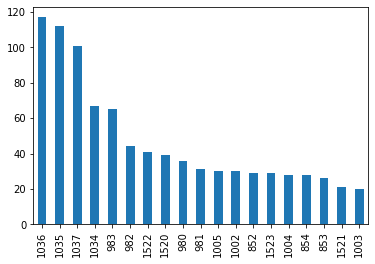

In [ ]:
#gráfico de barras
df["LojaID"].value_counts(ascending=False).plot.bar()

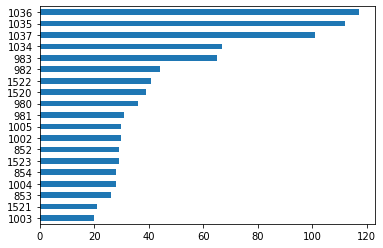

In [ ]:
#gráfico de barras horizontais
df["LojaID"].value_counts(ascending=True).plot.barh()

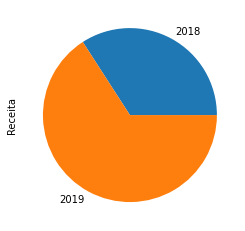

In [ ]:
#gráfico de pizza
df.groupby(df["Data"].dt.year)["Receita"].sum().plot.pie()

In [ ]:
#total de vendar por cidade
df["Cidade"].value_counts()

Natal        240
Salvador     240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

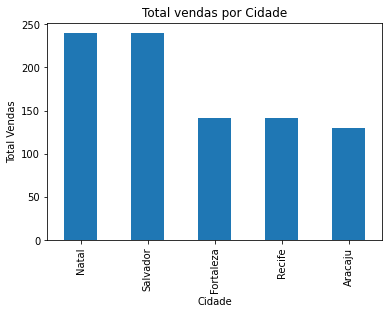

In [ ]:
#adicionando um título e alterando o nome dos eixos

import matplotlib.pyplot as plt
df["Cidade"].value_counts().plot.bar(title="Total vendas por Cidade")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas");  

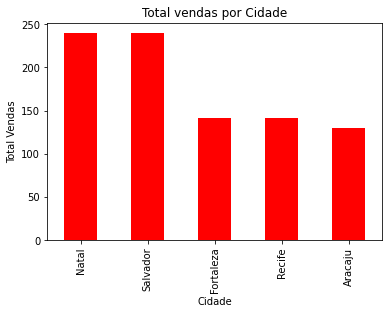

In [ ]:
#alterando a cor do gráfico
df["Cidade"].value_counts().plot.bar(title="Total vendas por Cidade", color="red")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas");

In [ ]:
#alterando o estilo
plt.style.use("ggplot")

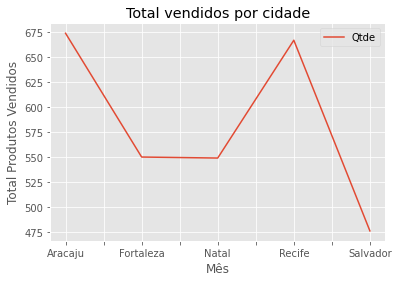

In [ ]:
df.groupby(df["Cidade"])["Qtde"].sum().plot(title="Total vendidos por cidade")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos");
plt.legend()

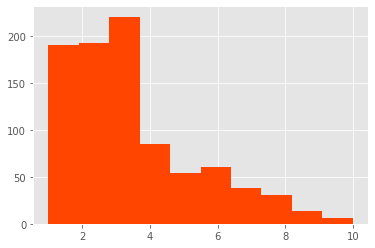

In [ ]:
#histograma
plt.hist(df["Qtde"], color="orangered");

In [ ]:
plt.scatter(x=df_2019["dia_venda"], y =  df_2019["Receita"]); 

NameError: ignored

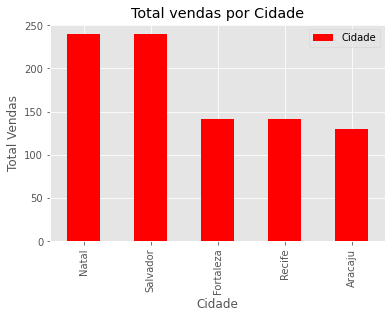

In [ ]:
#salvando em png 
df["Cidade"].value_counts().plot.bar(title="Total vendas por Cidade", color="red")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas");
plt.legend()
plt.savefig("Gráfico QTDE x MES.png")